## Lab 10 - Logit

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from itertools import product
from seaborn import plt

### Example 1:
Adapted from http://www.ats.ucla.edu/stat/r/dae/logit.htm

In [2]:
#adapted from http://www.ats.ucla.edu/stat/r/dae/logit.htm
x = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [3]:
#transpose matrix
x.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400,0.3175,0.466087,0.00,0.00,0.000,1.00,1
gre,400,587.7000,115.516536,220.00,520.00,580.000,660.00,800
gpa,400,3.3899,0.380567,2.26,3.13,3.395,3.67,4
rank,400,2.4850,0.944460,1.00,2.00,2.000,3.00,4


In [4]:
x.pivot_table(values='gre', index='admit', columns='rank', aggfunc='count')  # cross-tab

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


#### Linear Fit

In [5]:
lin = smf.ols('admit ~ gre + gpa + rank', x)
lin.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.02
Date:                Tue, 17 Feb 2015   Prob (F-statistic):           1.05e-08
Time:                        20:01:08   Log-Likelihood:                -241.53
No. Observations:                 400   AIC:                             491.1
Df Residuals:                     396   BIC:                             507.0
Df Model:                           3                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1824      0.217     -0.841      0.401        -0.609     0.244
gre            0.0004      0.000      2.106      0.036      2.94e-05     0.001
gpa            0.1510      0.063      2.383      0.018         0.026     0.276
rank          -0.1095      0.024     -4.608      0.000        -0.156    -0.063
==============================================================================
Omnibus:                      190.649   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.425
Skew:                           0.667   Prob(JB):                     6.81e-12
Kurtosis:                       1.858   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
lin0 = smf.ols('admit ~ 0 + gre + gpa + rank', x) #0 means you don't want intercept
lin0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     81.77
Date:                Tue, 17 Feb 2015   Prob (F-statistic):           3.28e-41
Time:                        20:01:18   Log-Likelihood:                -241.89
No. Observations:                 400   AIC:                             489.8
Df Residuals:                     397   BIC:                             501.8
Df Model:                           3                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0004      0.000      1.969      0.050      6.59e-07     0.001
gpa            0.1097      0.040      2.747      0.006         0.031     0.188
rank          -0.1164      0.022     -5.222      0.000        -0.160    -0.073
==============================================================================
Omnibus:                      204.151   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.878
Skew:                           0.678   Prob(JB):                     3.29e-12
Kurtosis:                       1.845   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Logit

In [7]:
lgt = smf.logit('admit ~ gre + gpa + rank', x)
logit_fit = lgt.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Feb 2015   Pseudo R-squ.:                 0.08107
Time:                        20:01:57   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 8.207e-09
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.4495      1.133     -3.045      0.002        -5.670    -1.229
gre            0.0023      0.001      2.101      0.036         0.000     0.004
gpa            0.7770      0.327      2.373      0.018         0.135     1.419
rank          -0.5600      0.127     -4.405      0.000        -0.809    -0.311
==============================================================================
"""

In [8]:
# factor rank:
x['rank_factor'] = x['rank'].astype(object) # cast integers as objects

In [9]:
lgt = smf.logit('admit ~ gre + gpa + rank_factor', x)
logit_fit = lgt.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Tue, 17 Feb 2015   Pseudo R-squ.:                 0.08292
Time:                        20:03:46   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -3.9900      1.140     -3.500      0.000        -6.224    -1.756
rank_factor[T.2]    -0.6754      0.316     -2.134      0.033        -1.296    -0.055
rank_factor[T.3]    -1.3402      0.345     -3.881      0.000        -2.017    -0.663
rank_factor[T.4]    -1.5515      0.418     -3.713      0.000        -2.370    -0.733
gre                  0.0023      0.001      2.070      0.038         0.000     0.004
gpa                  0.8040      0.332      2.423      0.015         0.154     1.454
====================================================================================
"""

In [10]:
#get odds ratio by exponentiating log-odds ratios
logit_fit.params.map(np.exp)

Intercept           0.018500
rank_factor[T.2]    0.508931
rank_factor[T.3]    0.261792
rank_factor[T.4]    0.211938
gre                 1.002267
gpa                 2.234545
dtype: float64

In [11]:
new_data = pd.DataFrame({'gre': x.gre.mean(), 'gpa': x.gpa.mean(), 
                         'rank_factor': np.array(range(1,5), dtype=object)})
new_data

,gpa,gre,rank_factor
0,3.3899,587.7,1
1,3.3899,587.7,2
2,3.3899,587.7,3
3,3.3899,587.7,4


#### Predict the probabilities for new data (varying rank)

In [12]:
new_data['rank_prob'] = logit_fit.predict(new_data)
new_data

,gpa,gre,rank_factor,rank_prob
0,3.3899,587.7,1,0.516602
1,3.3899,587.7,2,0.352285
2,3.3899,587.7,3,0.218612
3,3.3899,587.7,4,0.184668


#### Predict the probabilities for new data (varying gre)

In [14]:
new_data2 = pd.DataFrame(list(product(np.linspace(200, 800, 100), 
                                      np.array(range(1,5), dtype=object))),
                         columns = ['gre', 'rank_factor'])
new_data2['gpa'] = x.gpa.mean()
new_data2.describe().T

,count,mean,std,min,25%,50%,75%,max
gre,400,500.0000,175.164972,200.0000,350.0000,500.0000,650.0000,800.0000
rank_factor,400,2.5000,1.119434,1.0000,1.7500,2.5000,3.2500,4.0000
gpa,400,3.3899,0.000000,3.3899,3.3899,3.3899,3.3899,3.3899


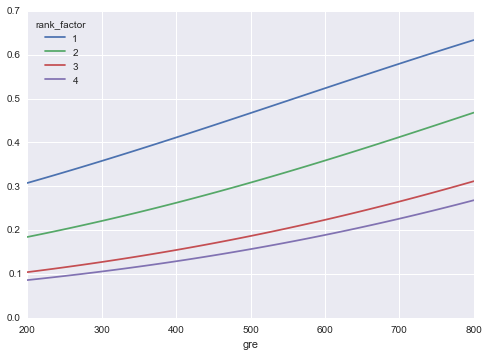

In [15]:
new_data2['pred'] = logit_fit.predict(new_data2)

new_data2.pivot(index='gre', columns='rank_factor', values='pred').plot()

#### Predict the probabilities for new data (varying gpa)

In [17]:
new_data3 = pd.DataFrame(list(product(np.linspace(0, 4, 100), 
                                      np.array(range(1,5), dtype=object))),
                         columns = ['gpa', 'rank_factor'])
new_data3['gre'] = x.gre.mean()
new_data3.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,400,2.0,1.167766,0.0,1.00,2.0,3.00,4.0
rank_factor,400,2.5,1.119434,1.0,1.75,2.5,3.25,4.0
gre,400,587.7,0.000015,587.7,587.70,587.7,587.70,587.7


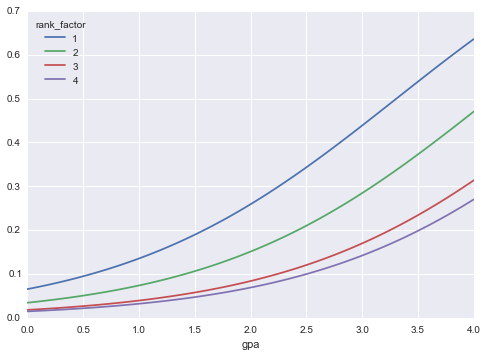

In [18]:
new_data3['pred'] = logit_fit.predict(new_data3)

new_data3.pivot(index='gpa', columns='rank_factor', values='pred').plot()

### Example 2:
#### Data - Grocery type of data about Milk Consumption 
#### Variables:
+ id - unique number for each consumer, 500 observations
+ product - binary variable (1,0); if product ==1 : consumer bought 2% milk, otherwise : fat-milk
+ full_price - full price before promotion (if any)
+ full_pri - the price after the discount/promotion
+ disc_price - totall amount of discount
+ bundle - if consumers buy the products as a bundle (2 per 6, 1 per 3)
+ time_day : 1== morning (until noon), otherwise: after noon-close
+ repeated? - if consumer i is a repated buyer in the store
+ repeated_bundle? - if consumer already buy the product as a bundle before

In [3]:
mdata = pd.read_csv('/Users/aprilsong/Documents/data_science/DAT_SF_12/data/milkdata.csv')
mdata.head(3)

,id,product,full_price,full_pri,promo,disc_price,bundle,time_day,repeated?,repeated_bundle?
0,1,1,2,1.58,1,0.42,1,1,1,1
1,2,1,2,1.15,1,0.85,1,1,0,1
2,3,1,3,2.25,1,0.75,0,1,1,1


In [4]:
mdata.describe().T

,count,mean,std,min,25%,50%,75%,max
id,500,250.50000,144.481833,1,125.75,250.50,375.25,500
product,500,0.65600,0.475517,0,0.00,1.00,1.00,1
full_price,500,2.49000,0.500401,2,2.00,2.00,3.00,3
full_pri,500,2.02276,0.513379,1,1.63,2.00,2.40,3
promo,500,0.58200,0.493724,0,0.00,1.00,1.00,1
disc_price,500,0.55436,0.562047,-1,0.00,0.48,1.00,2
bundle,500,0.62200,0.485373,0,0.00,1.00,1.00,1
time_day,500,0.70400,0.456948,0,0.00,1.00,1.00,1
repeated?,500,0.77600,0.417340,0,1.00,1.00,1.00,1
repeated_bundle?,500,0.74800,0.434596,0,0.00,1.00,1.00,1


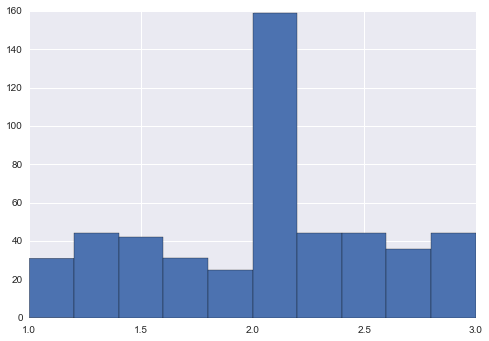

In [5]:
mdata.full_pri.hist()

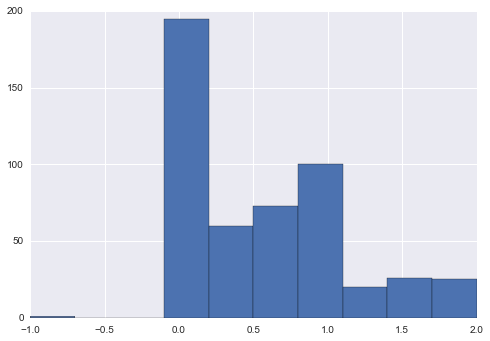

In [6]:
mdata.disc_price.hist()

#### Run a simple logit model where yi = Prob(product i = 1) on all other variables in the data

In [7]:
mdata.columns[2:]

Index([u'full_price', u'full_pri', u'promo', u'disc_price', u'bundle', u'time_day', u'repeated?', u'repeated_bundle?'], dtype='object')

In [8]:
train_cols = mdata.columns[2:]

In [9]:
logit = smf.Logit(mdata["product"], mdata[train_cols])

In [10]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.583270
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                product   No. Observations:                  500
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                            7
Date:                Wed, 18 Mar 2015   Pseudo R-squ.:                 0.09381
Time:                        13:54:51   Log-Likelihood:                -291.63
converged:                       True   LL-Null:                       -321.83
                                        LLR p-value:                 1.266e-10
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
full_price          -0.8837      0.515     -1.717      0.086        -1.893     0.125
full_pri             0.3279      0.462      0.710      0.478        -0.577     1.233
promo               -0.1351      0.448     -0.301      0.763        -1.014     0.744
disc_price           0.4445      0.559      0.795      0.427        -0.652     1.541
bundle               0.6897      0.259      2.665      0.008         0.183     1.197
time_day             1.3524      0.210      6.449      0.000         0.941     1.763
repeated?            0.6464      0.269      2.401      0.016         0.119     1.174
repeated_bundle?     0.2952      0.387      0.763      0.445        -0.463     1.053
====================================================================================
"""

#### What is the expeced probability that a consumer will buy 2% milk if all other variables are equal to the avegrage (mean) number in the whole sample?

In [11]:
train_data = mdata[train_cols]

avg_values = train_data.mean()
avg_values

full_price          2.49000
full_pri            2.02276
promo               0.58200
disc_price          0.55436
bundle              0.62200
time_day            0.70400
repeated?           0.77600
repeated_bundle?    0.74800
dtype: float64

In [12]:
results.predict(avg_values)

0.67569667064198213

#### Which variables are signficant and which are not? (95 percent confident)

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                product   No. Observations:                  500
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                            7
Date:                Wed, 18 Mar 2015   Pseudo R-squ.:                 0.09381
Time:                        13:59:15   Log-Likelihood:                -291.63
converged:                       True   LL-Null:                       -321.83
                                        LLR p-value:                 1.266e-10
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
full_price          -0.8837      0.515     -1.717      0.086        -1.893     0.125
full_pri             0.3279      0.462      0.710      0.478        -0.577     1.233
promo               -0.1351      0.448     -0.301      0.763        -1.014     0.744
disc_price           0.4445      0.559      0.795      0.427        -0.652     1.541
bundle               0.6897      0.259      2.665      0.008         0.183     1.197
time_day             1.3524      0.210      6.449      0.000         0.941     1.763
repeated?            0.6464      0.269      2.401      0.016         0.119     1.174
repeated_bundle?     0.2952      0.387      0.763      0.445        -0.463     1.053
====================================================================================
"""

Statistically significant: bundle, time_day, repeated?

#### By reading the output from this regression - would you recommend for the Marketing Team to sell milk in bundle? yes? no? explain?

In [14]:
results.params[4]

0.68966845488798456

Yes, if the goal is to sell more 2% milk.